# Flight Price Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()

In [2]:
## To ignore the warnings
warnings.filterwarnings(action="ignore")

## Importing dataset

In [3]:
train_data = pd.read_excel("Data_Train.xlsx")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
## To get quick info about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
## To check whether any null values are there or not
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
## Found only 2 null values that's why removing those rows
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

## EDA

In [10]:
## Extracting only day of that date
train_data["Journey_day"] = train_data.Date_of_Journey.str.split("/").str[0].astype(int)

## Extracting only month of that date
train_data["Journey_month"] = train_data.Date_of_Journey.str.split("/").str[1].astype(int)

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
## Since we extracted Day and Month of Journey as 2 new features, Now we can drop it.
train_data.drop("Date_of_Journey", inplace=True, axis=1)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
## Departure time is when a plane leaves the gate. 
## Similar to Date_of_Journey we can extract values from Dep_Time

## Extracting Hours
train_data["Dep_hour"] = train_data.Dep_Time.str.split(":").str[0].astype(int)

## Extracting Minutes
train_data["Dep_min"] = train_data.Dep_Time.str.split(":").str[1].astype(int)

## Now we can drop Dep_Time as it is of no use
train_data.drop("Dep_Time", axis=1, inplace=True)

In [29]:
## To check first 5 rows
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [31]:
## Arrival time is when the plane pulls up to the gate.
## To check some sample values from Arrival_Time feature
train_data["Arrival_Time"].sample(10)

2089    07:40 19 Mar
7032    07:40 13 Mar
6300    12:35 28 Jun
8142           22:00
9128    10:05 13 Jun
3151    04:25 19 May
3727           22:30
9957           21:00
5659    01:30 10 Apr
4913    09:00 19 Mar
Name: Arrival_Time, dtype: object

In [33]:
##  Similar to Date_of_Journey we can extract values from Arrival_Time
## Extracting Hours
train_data["Arrival_hour"] = train_data.Arrival_Time.str.split().str[0].str.split(":").str[0].astype(int)

## Extracting Minutes
train_data["Arrival_min"] = train_data.Arrival_Time.str.split().str[0].str.split(":").str[1].astype(int)

# Now we can drop Arrival_Time as it is of no use
train_data.drop("Arrival_Time", axis=1, inplace=True)

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [37]:
## Time taken by plane to reach destination is called Duration

## Created Python Function to extract Hours from Duration column
def Duration_to_Hours(x):
    l = x.split(" ")
    if l[0][-1] == "h":
        return l[0][:-1]
    else:
        return 0

## Apply above Function to get new feature Duration_Hours
train_data["Duration_Hours"] = train_data["Duration"].apply(Duration_to_Hours).astype(int)

In [41]:
## Created Python Function to extract Minutes from Duration column
def Duration_to_Minutes(x):
    l = x.split(" ")
    if l[-1][-1] == "m":
        return l[-1][:-1]
    elif l[-1][-1] == "h":
        return 0
    else:
        return 0

## Apply above Function to get new feature Duration_Minutes
train_data["Duration_Minutes"] = train_data["Duration"].apply(Duration_to_Minutes).astype(int)

In [49]:
## Now we can drop Duration as it is of no use
train_data.drop("Duration", axis=1, inplace=True)

In [51]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data

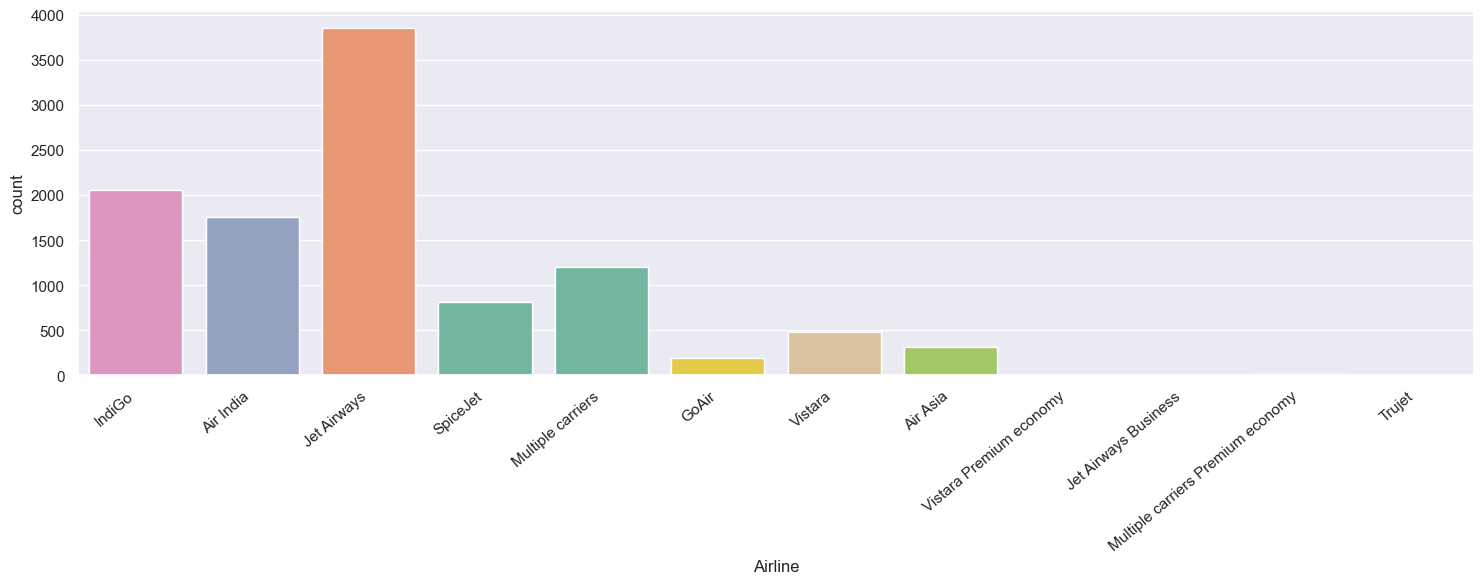

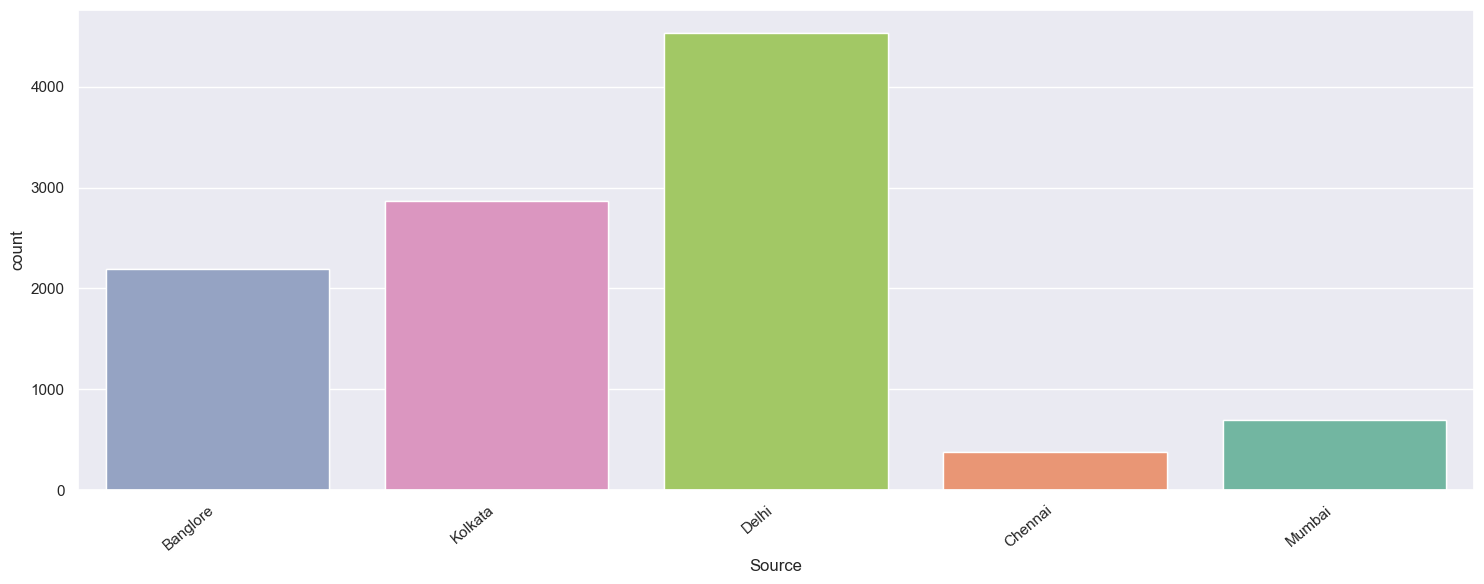

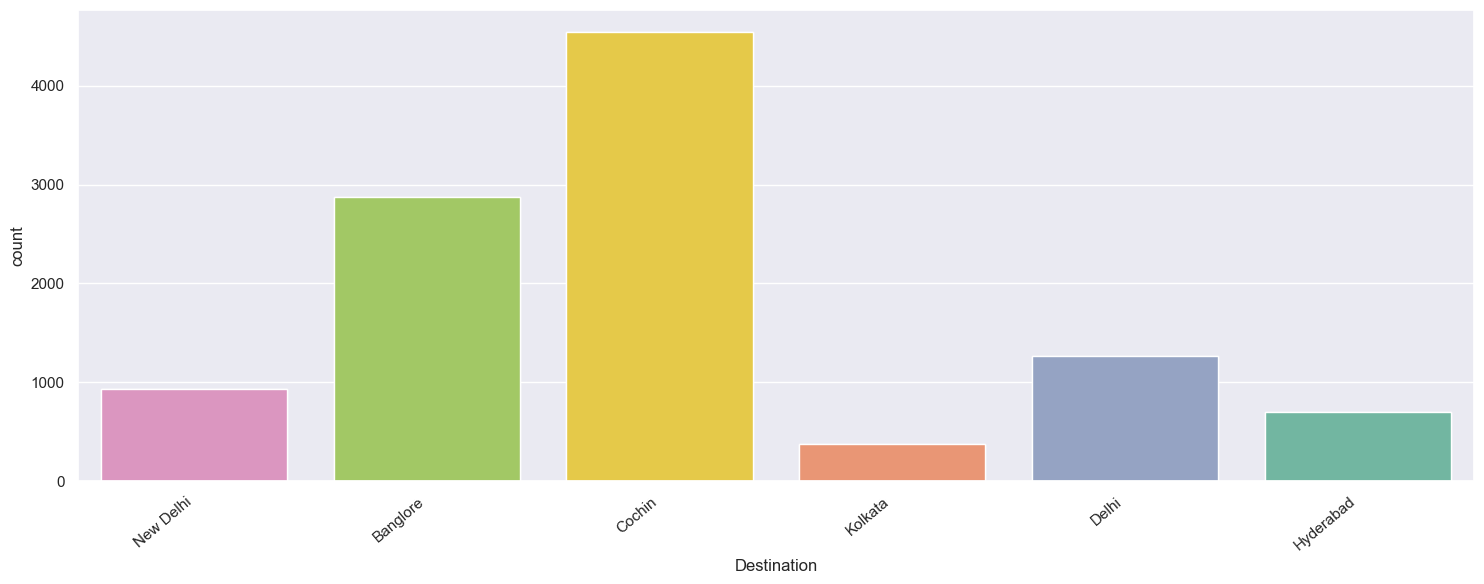

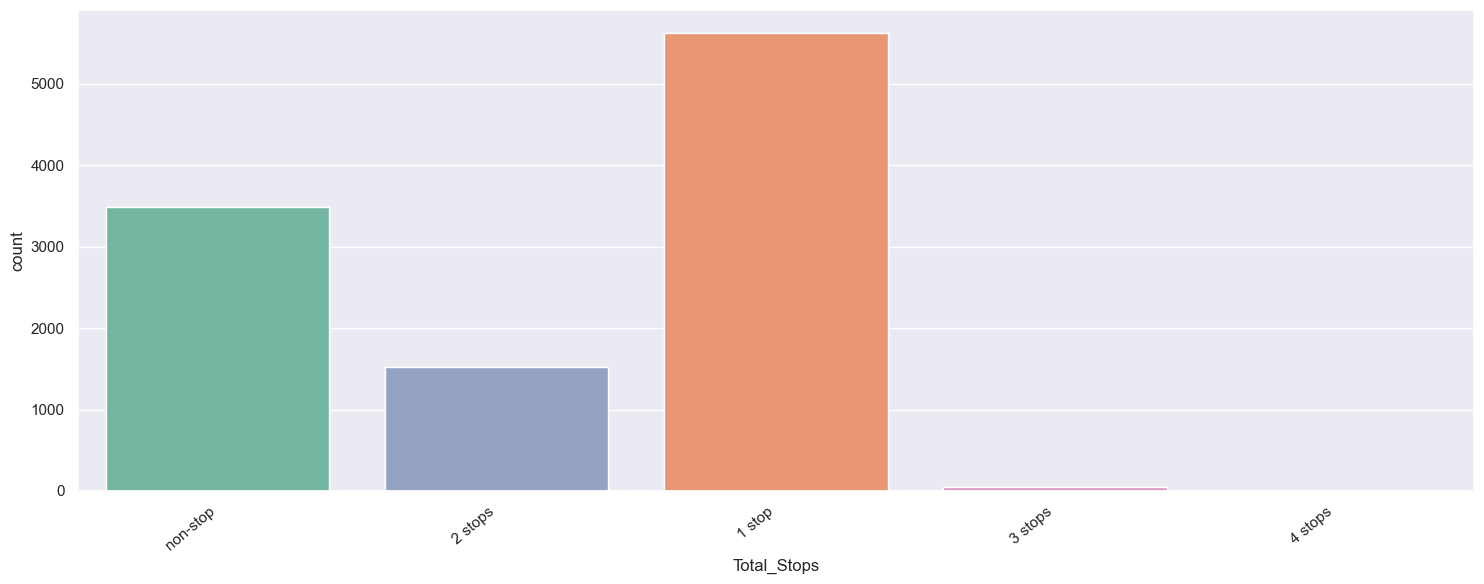

In [53]:
## Let's take help from Python's Visualization Libraries
## Displaying the distribution of the categorical data in dataset

for i in ["Airline", "Source", "Destination", "Total_Stops"]:
    plt.figure(figsize = (15,6))
    sns.countplot(data = train_data, x = i)
    ax = sns.countplot(x = i, data = train_data.sort_values("Price", ascending = True),palette="Set2")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()
    print("\n\n")

In [63]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

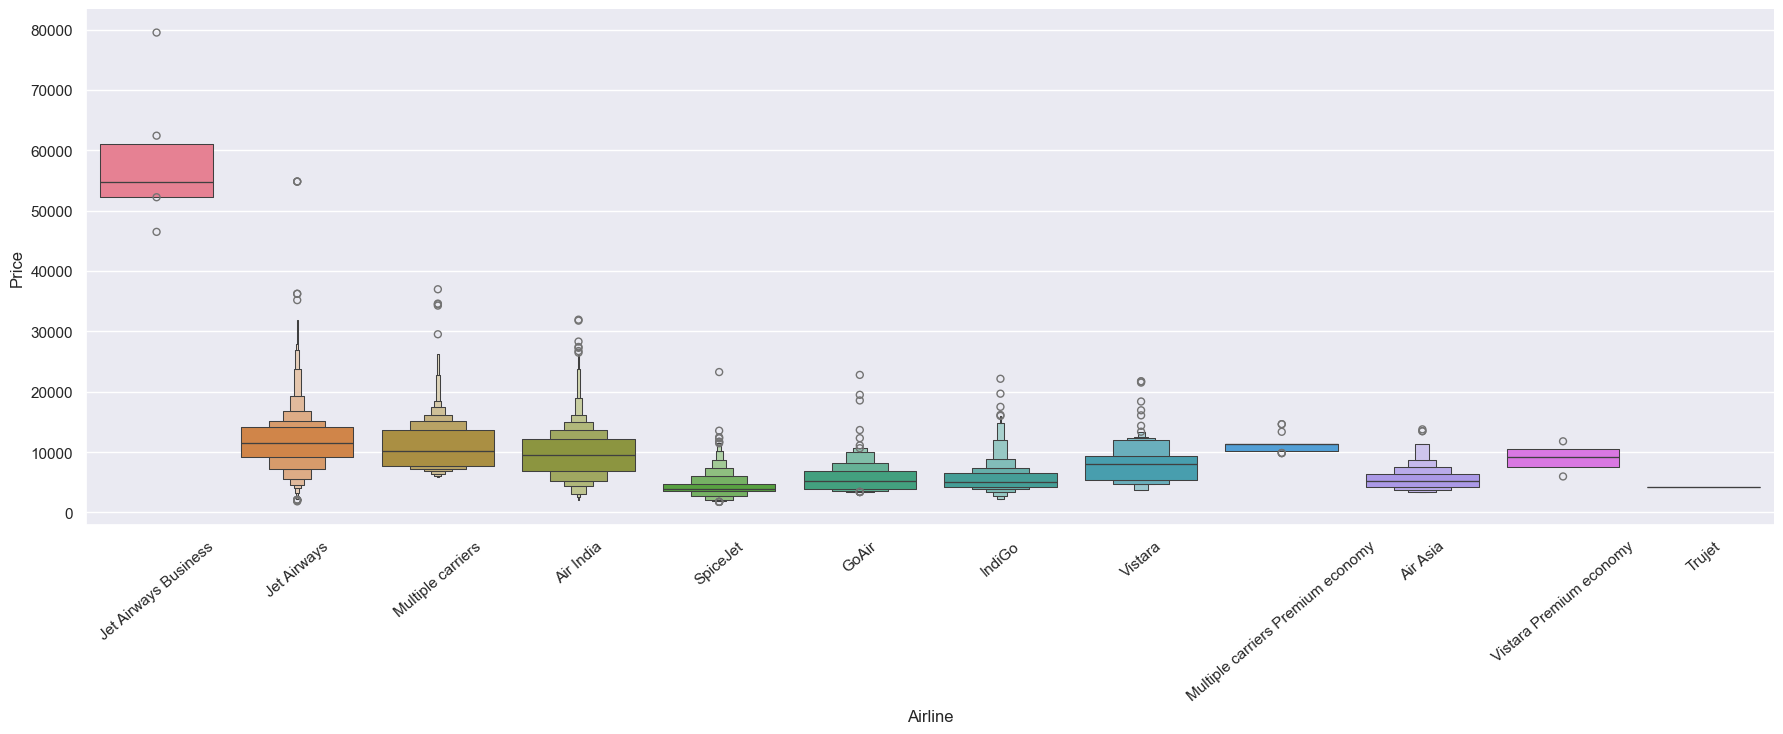

In [65]:
## From graph we can see that Jet Airways Business have the highest Price.
## Apart from the first Airline almost all are having similar median

## Airline vs Price
b = sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3,palette="husl")
b.set_xticklabels(rotation=40)
plt.title("Airline vs Price")
plt.show()

In [66]:
## As Airline is Nominal Categorical data we will perform OneHotEncoding
airline = pd.get_dummies(train_data[["Airline"]], sparse=False, drop_first=True, dtype=int)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [69]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

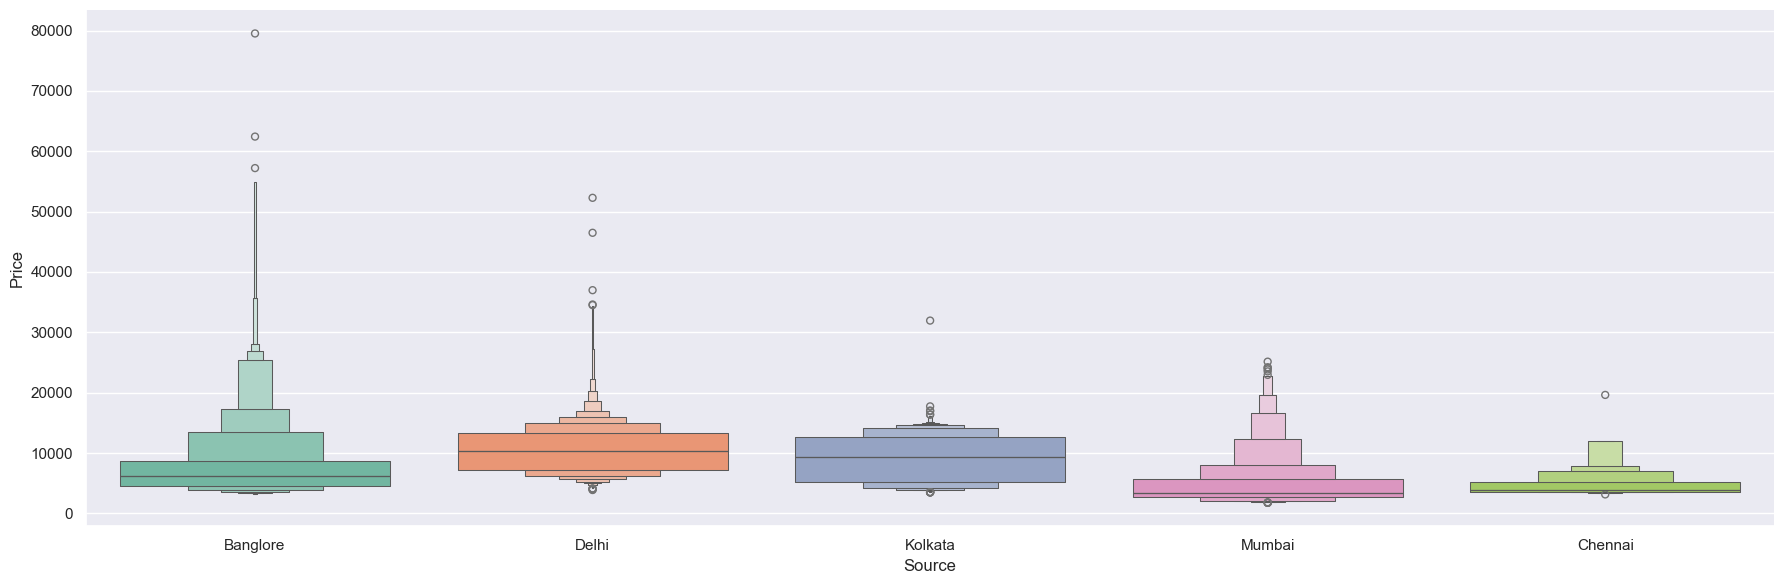

In [71]:
## Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3,palette="Set2")
plt.title("Source vs Price")
plt.show()

In [73]:
## As Source is Nominal Categorical data we will perform OneHotEncoding

source = pd.get_dummies(train_data[["Source"]], drop_first=True, sparse=False, dtype=int)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


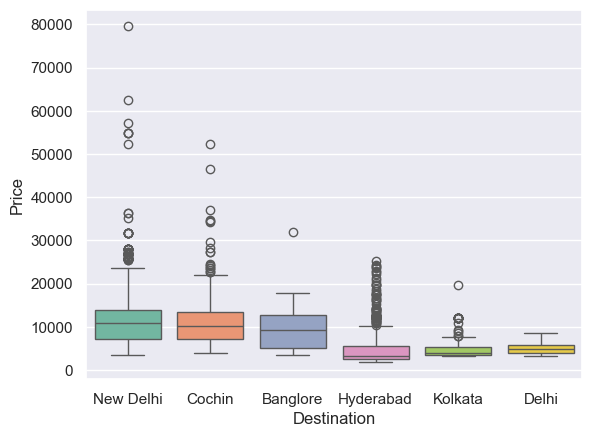

In [75]:
## Destination vs Price

sns.boxplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending=False),palette="Set2")
plt.title("Destination vs Price")
plt.show()

In [77]:
## Let's correct New Delhi and Delhi to Delhi only
train_data["Destination"] = train_data["Destination"].apply(lambda x:x.split(" ")[-1] if x == "New Delhi" else x)

In [79]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

destination = pd.get_dummies(train_data[["Destination"]], drop_first=True, sparse=False, dtype=int)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [54]:
train_data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [ ]:
## As this is case of Ordinal Categorical type we perform LabelEncoder
## Here Values are assigned with corresponding keys

train_data.replace({
    "non-stop": 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}, inplace=True)

In [ ]:
train_data.head()

In [81]:
## Route and Total_Stops are related to each other
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [83]:
train_data["Additional_Info"].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [85]:
## Additional_Info contains more than 78% values as No info
(train_data["Additional_Info"].value_counts()/train_data.shape[0])*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [91]:
## Concatenate dataframe --> train_data + Airline + Source + Destination
train_data_tr = pd.concat([train_data, airline, source, destination], axis=1)

In [87]:
## Now we can drop these columns
train_data.drop(["Airline", "Source", "Destination", "Additional_Info", "Route"], axis=1, inplace=True)

In [89]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [95]:
train_data_tr.shape

(10682, 29)

## Test Set

In [ ]:
test_data = pd.read_excel("Data_Test.xlsx")
test_data.head()

In [ ]:
test_data.info()

In [97]:
## Preprocessing Test Set

test_data.dropna(inplace=True)

test_data["Journey_day"] = test_data.Date_of_Journey.str.split("/").str[0].astype(int)
test_data["Journey_month"] = test_data.Date_of_Journey.str.split("/").str[1].astype(int)
test_data.drop("Date_of_Journey", inplace=True, axis=1)

test_data["Dep_hour"] = test_data.Dep_Time.str.split(":").str[0].astype(int)
test_data["Dep_min"] = test_data.Dep_Time.str.split(":").str[1].astype(int)
test_data.drop("Dep_Time", axis=1, inplace=True)

test_data["Arrival_hour"] = test_data.Arrival_Time.str.split().str[0].str.split(":").str[0].astype(int)
test_data["Arrival_min"] = test_data.Arrival_Time.str.split().str[0].str.split(":").str[1].astype(int)
test_data.drop("Arrival_Time", axis=1, inplace=True)

test_data["Duration_Hours"] = test_data["Duration"].apply(Duration_to_Hours).astype(int)
test_data["Duration_Minutes"] = test_data["Duration"].apply(Duration_to_Minutes).astype(int)
test_data.drop("Duration", axis=1, inplace=True)

airline = pd.get_dummies(test_data[["Airline"]], sparse=False, drop_first=True, dtype=int)

source = pd.get_dummies(test_data[["Source"]], drop_first=True, sparse=False, dtype=int)

test_data["Destination"] = test_data["Destination"].apply(lambda x:x.split(" ")[-1] if x == "New Delhi" else x)
destination = pd.get_dummies(test_data[["Destination"]], drop_first=True, sparse=False, dtype=int)

test_data.replace({
    "non-stop": 0,
    '1 stop' : 1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4
}, inplace=True)

test_data_tr = pd.concat([test_data, airline, source, destination], axis=1)

test_data.drop(["Airline", "Source", "Destination", "Additional_Info", "Route"], axis=1, inplace=True)

test_data_tr.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,0,1,0,0,1,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,0,1,0,0


In [98]:
test_data_tr.shape   
## There is a column is not present in test_data_tr  'Airline_Trujet'  which is part of Airline
## that's why the columns count is less as compared to train_data_tr

(2671, 27)

## Feature Selection

In [101]:
X = train_data_tr.drop("Price", axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
y = train_data_tr.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

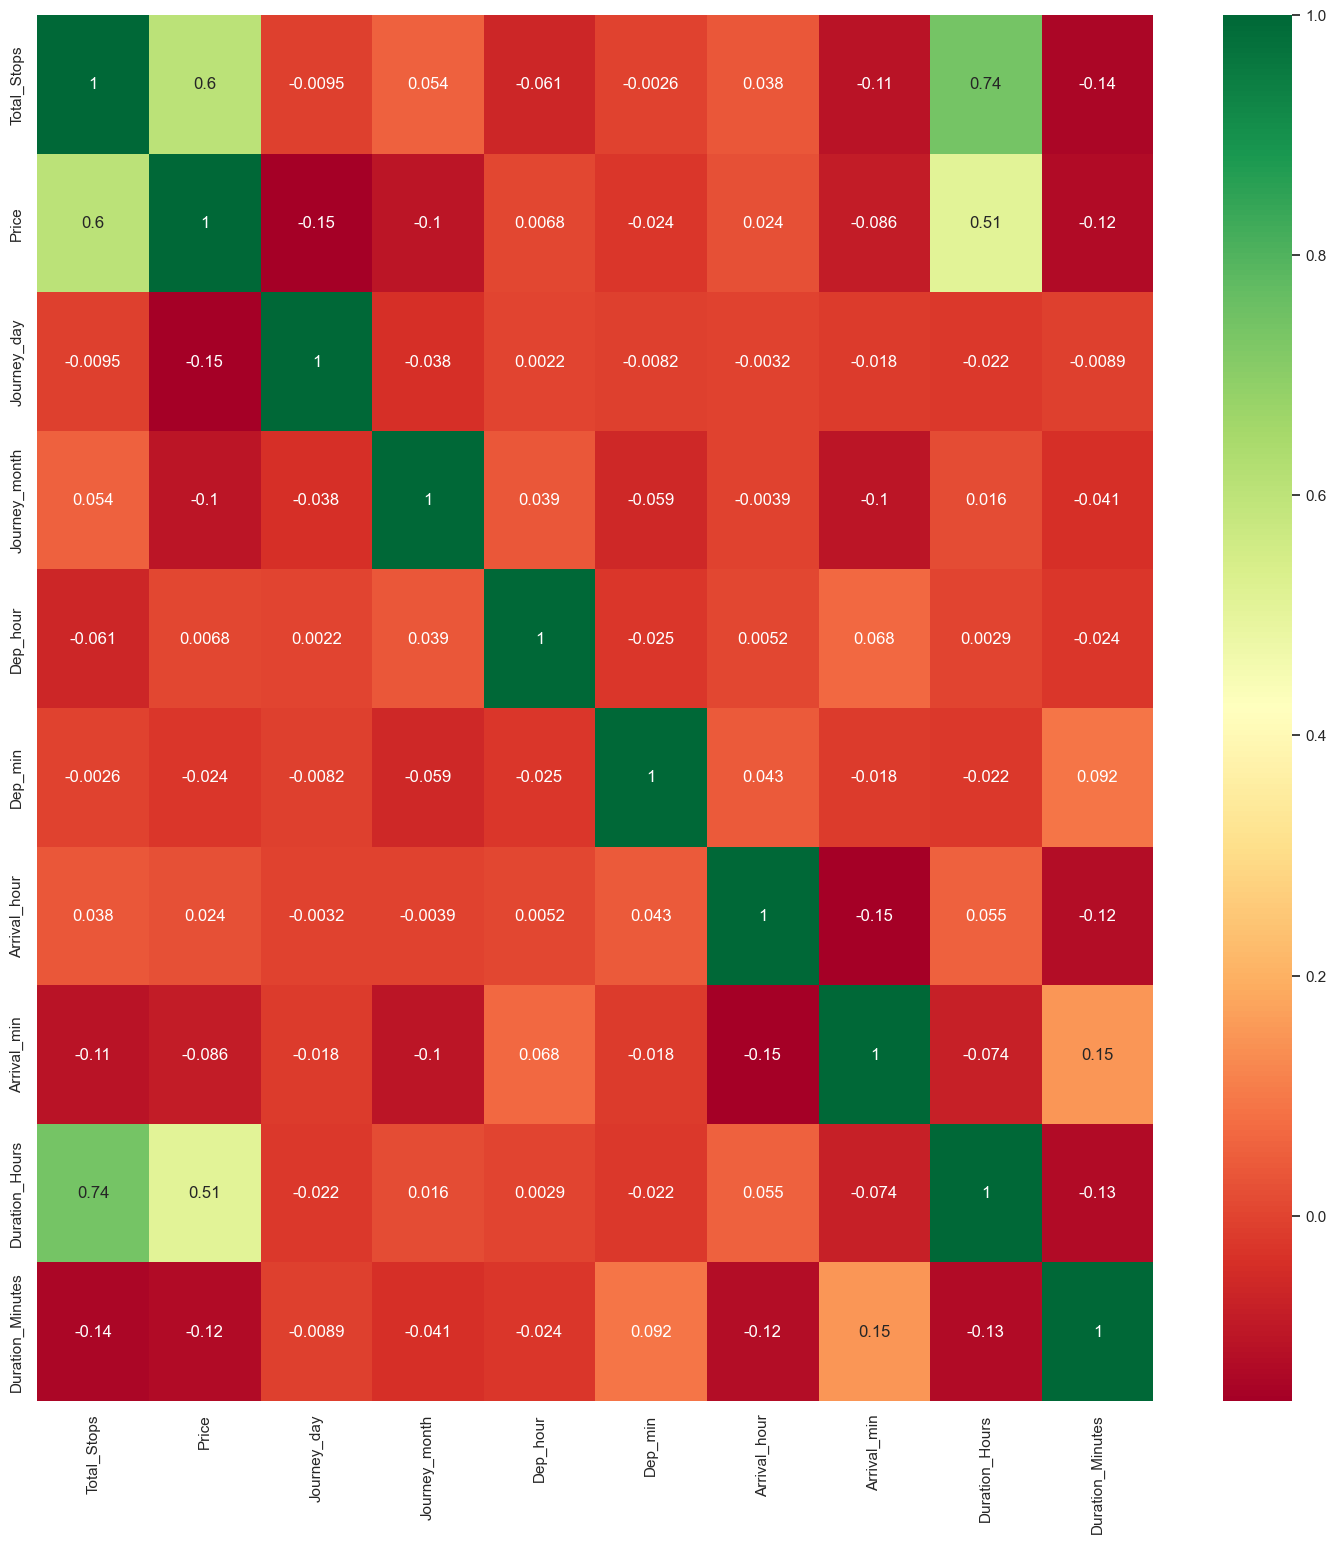

In [105]:
## Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [107]:
## Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [108]:
print(selection.feature_importances_)

[2.33668546e-01 1.40556837e-01 5.96515445e-02 2.43201456e-02
 2.16480584e-02 2.79758390e-02 1.94962756e-02 1.28277303e-01
 1.78673176e-02 9.25414733e-03 2.03739171e-03 1.92850619e-02
 1.34164615e-01 6.68253787e-02 1.74184249e-02 8.50114820e-04
 5.74191461e-03 1.08583274e-04 4.57614553e-03 6.42559003e-05
 6.45220443e-04 9.02669598e-03 4.78096608e-03 8.79812188e-03
 1.31696818e-02 1.97775689e-02 9.15682985e-03 8.57014531e-04]


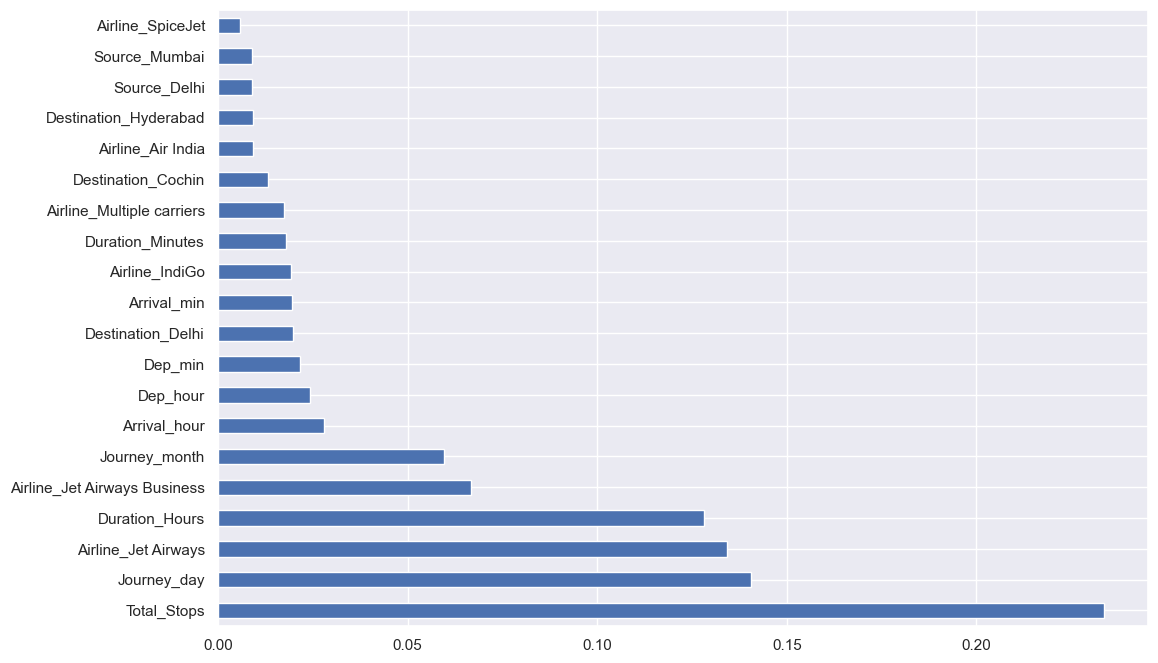

In [111]:
## Plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using LinearRegression and Random Forest

In [113]:
## Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
## Split dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=11)

In [117]:
X_train

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
1879,2,27,6,9,40,12,35,26,55,0,...,0,0,0,1,0,0,1,0,0,0
2357,0,21,6,22,10,1,0,2,50,0,...,0,0,0,0,0,0,0,1,0,0
2900,1,24,3,16,55,18,10,25,15,0,...,0,0,0,0,1,0,0,0,0,0
3065,0,1,6,10,20,12,55,2,35,0,...,0,0,0,0,1,0,0,0,0,0
5142,2,12,6,11,45,4,25,16,40,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,2,1,6,5,30,12,35,7,5,0,...,0,0,0,1,0,0,1,0,0,0
7259,2,15,6,5,30,4,25,22,55,0,...,0,0,0,1,0,0,1,0,0,0
5200,1,18,5,19,35,23,15,3,40,0,...,0,0,0,0,1,0,0,0,0,0
3775,1,12,5,6,30,9,20,26,50,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
X_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
2878,1,6,3,13,5,16,20,3,15,0,...,0,0,0,0,0,1,0,0,1,0
2001,0,27,5,8,20,11,20,3,0,0,...,0,0,0,0,0,0,0,1,0,0
690,0,3,4,19,35,21,5,1,30,0,...,0,0,0,0,0,1,0,0,1,0
4614,0,15,5,21,5,23,55,2,50,1,...,0,0,0,0,0,0,0,1,0,0
4056,1,21,3,9,0,15,30,6,30,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,1,18,3,11,40,7,40,20,0,0,...,0,0,0,0,0,0,0,1,0,0
6813,1,1,5,20,25,21,5,24,40,0,...,0,0,0,0,1,0,0,0,0,0
7804,0,27,4,7,45,10,40,2,55,0,...,0,0,0,0,0,0,0,1,0,0
463,0,9,3,6,0,8,45,2,45,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
y_train

1879     13014
2357      3943
2900     14231
3065      4409
5142     13882
         ...  
4023     13344
7259     13014
5200      4226
3775      9663
10138     5628
Name: Price, Length: 8545, dtype: int64

In [123]:
y_test

2878     4140
2001     7229
690      2071
4614     5228
4056    14486
        ...  
9321    12284
6813    12121
7804     5048
463      7648
2385     4804
Name: Price, Length: 2137, dtype: int64

In [125]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [127]:
lr_y_hat_train = LR.predict(X_train)

print(f"Training Accuracy: {r2_score(y_train, lr_y_hat_train):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, lr_y_hat_train):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, lr_y_hat_train):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, lr_y_hat_train)):.2f}")

print()

lr_y_hat_test = LR.predict(X_test)

print(f"Testing Accuracy: {r2_score(y_test, lr_y_hat_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lr_y_hat_test):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lr_y_hat_test):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, lr_y_hat_test)):.2f}")

Training Accuracy: 0.61
Mean Absolute Error: 1968.24
Mean Squared Error: 8293001.14
Root Mean Squared Error: 2879.76

Testing Accuracy: 0.61
Mean Absolute Error: 2013.15
Mean Squared Error: 8222964.42
Root Mean Squared Error: 2867.57


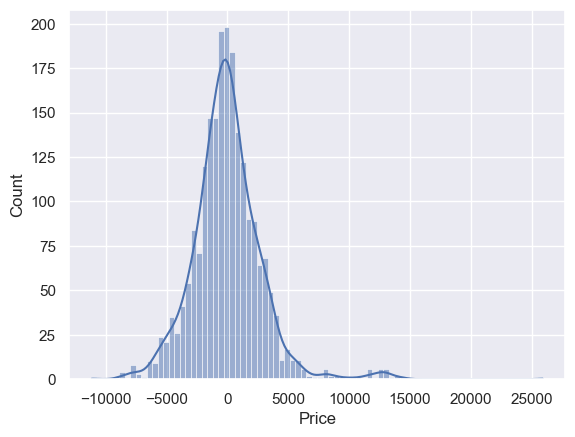

In [129]:
sns.histplot(y_test-lr_y_hat_test, kde=True)
plt.show()

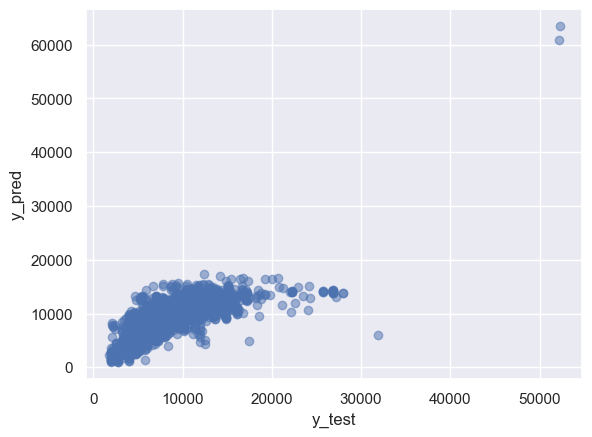

In [131]:
plt.scatter(y_test, lr_y_hat_test, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [133]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
rf_y_hat_train = RandomForest.predict(X_train)

print(f"Training Accuracy: {r2_score(y_train, rf_y_hat_train):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, rf_y_hat_train):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, rf_y_hat_train):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, rf_y_hat_train)):.2f}")

print()

rf_y_hat_test = RandomForest.predict(X_test)

print(f"Testing Accuracy: {r2_score(y_test, rf_y_hat_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_y_hat_test):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_y_hat_test):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, rf_y_hat_test)):.2f}")

Training Accuracy: 0.95
Mean Absolute Error: 563.51
Mean Squared Error: 1000709.72
Root Mean Squared Error: 1000.35

Testing Accuracy: 0.82
Mean Absolute Error: 1176.74
Mean Squared Error: 3742249.96
Root Mean Squared Error: 1934.49


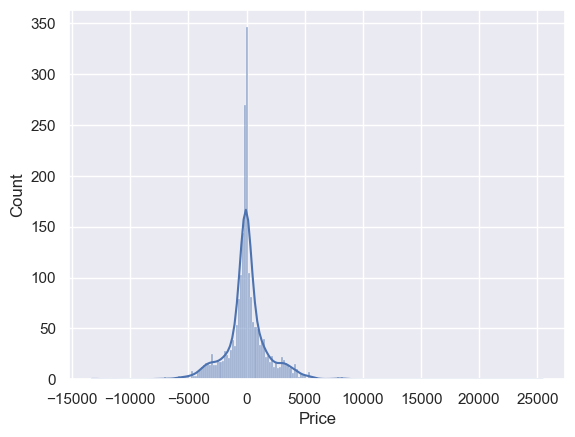

In [135]:
sns.histplot(y_test-rf_y_hat_test, kde=True)
plt.show()

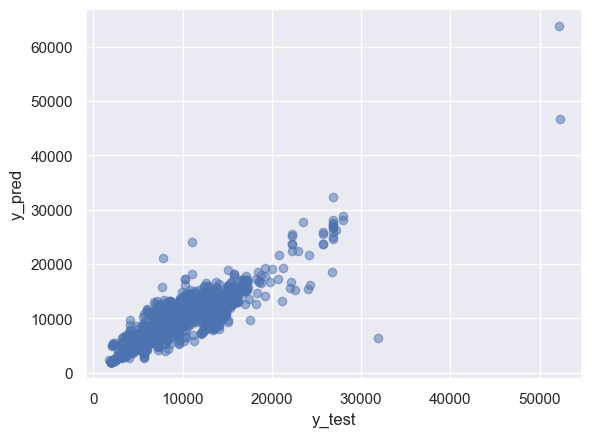

In [136]:
plt.scatter(y_test, rf_y_hat_test, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Hyperparameter Tuning

In [141]:
## Randomized Search CV to find out best paramters and best accuracy

## Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 700, stop = 900, num = 100)]

## Number of features to consider at every split
max_features = ['sqrt',6,7,8,9]

## Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,35, num = 30)]

## Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 5, stop = 35, num = 30)]

In [143]:
## Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
              }

In [145]:
## Random search of parameters, using 5 fold cross validation, 
## search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [147]:
random_search_report = rf_random.fit(X_train,y_train)
random_search_report

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 35],
                                        'max_features': ['sqrt', 6, 7, 8, 9],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24, 25, 26,
                                                              27, 28, 29, 30,
                                                              31, 32, 33, 35],
                                        'n_estimators': [700, 702, 704, 706,
                                                         708, 710, 712, 714,
                                                         716, 718, 720, 722,
                                                         724, 726, 728, 730,
                                                         732, 734, 736, 738,
                                                         740, 742, 744, 746,
                                                         748, 750, 752, 754,
                                                         756, 758, ...]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [149]:
rf_random.best_params_

{'n_estimators': 885,
 'min_samples_split': 13,
 'max_features': 9,
 'max_depth': 18}

In [151]:
r_y_hat_train = rf_random.predict(X_train)

print(f"Training Accuracy: {r2_score(y_train, r_y_hat_train):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, r_y_hat_train):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_train, r_y_hat_train):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, r_y_hat_train)):.2f}")

print()

r_y_hat_test = rf_random.predict(X_test)

print(f"Testing Accuracy: {r2_score(y_test, r_y_hat_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, r_y_hat_test):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, r_y_hat_test):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, r_y_hat_test)):.2f}")

Training Accuracy: 0.89
Mean Absolute Error: 965.44
Mean Squared Error: 2307782.36
Root Mean Squared Error: 1519.14

Testing Accuracy: 0.85
Mean Absolute Error: 1200.83
Mean Squared Error: 3280160.36
Root Mean Squared Error: 1811.12


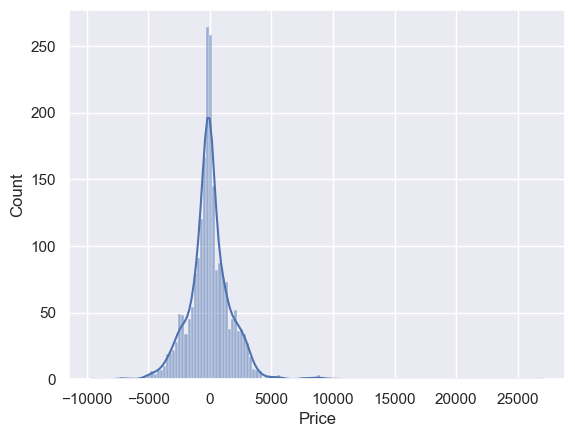

In [155]:
sns.histplot(y_test-r_y_hat_test, kde=True)
plt.show()

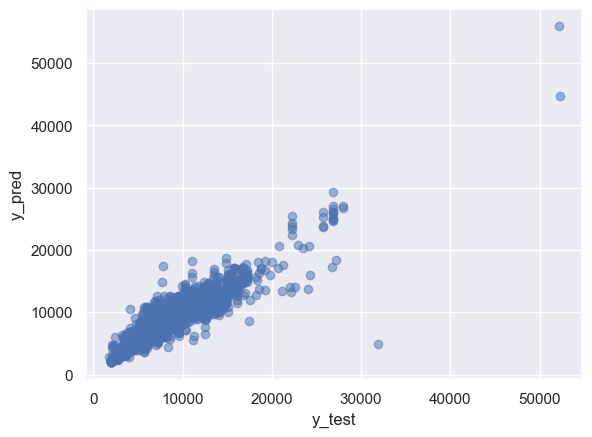

In [157]:
plt.scatter(y_test, r_y_hat_test, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Save the model to reuse it again

In [1]:
import pickle
# ## open a file, where you want to store the data
# file = open("flight_fare_prediction.pkl", "wb")

# ## dump information in file
# pickle.dump(rf_random, file)

In [3]:
## Let's load the model again and predict the Flight Fare
model = open("flight_fare_prediction.pkl", "rb")
random_forest_reg = pickle.load(model)

In [166]:
y_prediction = random_forest_reg.predict(X_test)
y_prediction

array([10502.33205349,  5804.4878896 ,  4811.79495336, ...,
        4355.7329392 ,  6271.34749947,  4752.24359423])

In [168]:
r2_score(y_test, y_prediction)

0.8453052516826566

In [ ]:
random_forest_reg.predict()